In [51]:
# для импорта функций и классов из папки с лекциями нам нужно добавить путь в файлу с лекцией
import sys
sys.path.append('../../../bin') # поднимаемся на три папки вверх и переходим в папку bin
from Lection_006 import Mech_properties, Flow_stress
import numpy as np
import matplotlib.pyplot as plt

In [52]:
load_stroke_data = np.loadtxt ('3_20.txt',delimiter='\t')
load_stroke_data = load_stroke_data [:, 1:] # удаляем первый столбец (это время, насколько я понял)

In [53]:
# размеры образца
d0 = 9.2 # диаметр
L0 = 15 # длина образца

# плащадь сечения образца
A0 = (np.pi*d0**2)/2


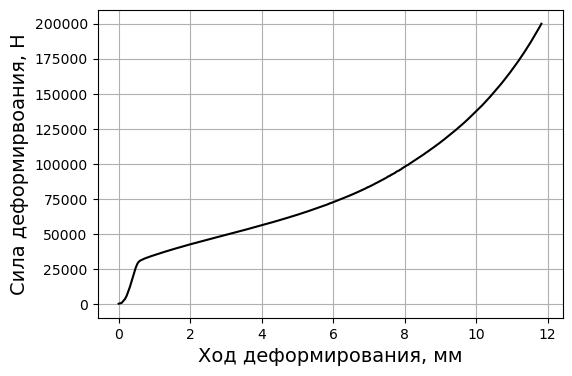

In [54]:
# Создаем объект класса Mech_properties
mech_properties = Mech_properties (load_stroke_data [:, 0], load_stroke_data [:, 1], L0, A0)

# посмотрим на график
mech_properties.plot_graph(mech_properties.stroke, mech_properties.load, 'Ход деформирования, мм', 'Сила деформирвоания, Н')

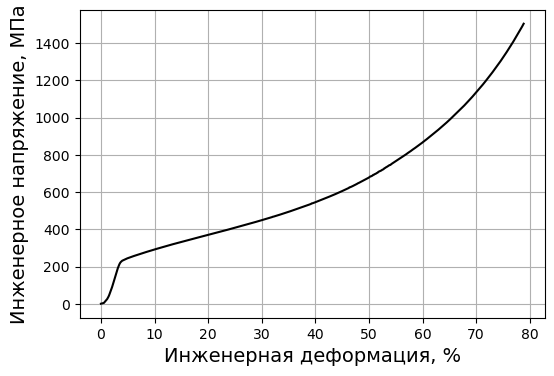

In [55]:
# посчитаем инженерные напряжения/деформации и посмотрим на график
_ = mech_properties.get_strain_eng() # отдельная переменная нам не нужно, так так массив с инженерной деформацией 
                                        #будет храниться в переменной класса
_ = mech_properties.get_stress_eng()

# посмотрим на график
mech_properties.plot_graph(mech_properties.strain_eng, mech_properties.stress_eng, 'Инженерная деформацияб %', 'Инженерное напряжение, Н')


    Предел прочности и равномерное удлинение мы определить по результатам испытания образца на сжатие не сможем, так что ограничимся пределом текучести и модулем Юнга

## Расчет модуля Юнга и предела текучести пока не получется провести, т.к. очень большая доля выборки зазора в линейной части графика.
## Померейти, пожалуйста, конечную высоту образца. Попробуем понять какова величина выборки зазора.

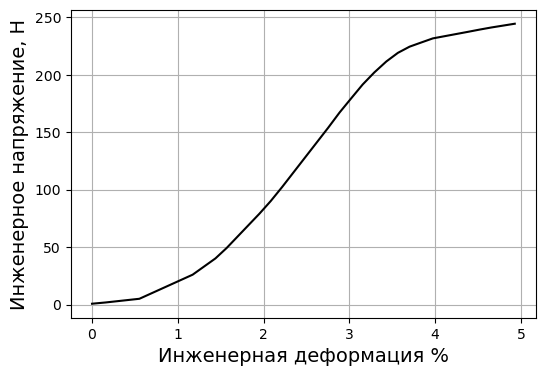

In [61]:
# На данном этапе предел текучести давайте выберем визуально. Для этого посмотрим на данные поближе
mech_properties.plot_graph(mech_properties.strain_eng[:25], mech_properties.stress_eng[:25], 'Инженерная деформация %', 'Инженерное напряжение, МПа')

In [62]:
# Примим предел текучести yield_stress равным 225 МПа

# Создаем объект класса Flow_stress
flow_stress = Flow_stress(mech_properties.strain_eng, mech_properties.stress_eng, yield_stress = 225)

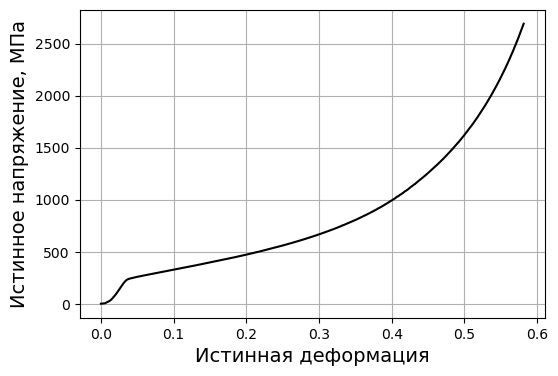

In [66]:
# посчитаем истинные напряжения и деформации
_ = flow_stress.get_strain_true()
_ = flow_stress.get_stress_true()

# посмотрим что получилось
flow_stress.plot_graph(flow_stress.strain_true, flow_stress.stress_true,  'Истинная деформация', 'Истинное напряжение, МПа')